# Construct different Hamniltonians and their Quantum Boltzmann Machines

In this brief notebook we will have a look at different Hamiltonians and their corresponding Gibbs states, aka Quantum Boltzmann Machines.

## Setup

We will use the [`quimb`](https://quimb.readthedocs.io) library to describe the states, density matrices, and Hamiltonians.
`quimb` provides some pre-defined hamiltonians for common many-body quantum systems in 1D and 2D, like the ones used in the [VQE-generated quantum circuit dataset](http://arxiv.org/abs/2302.09751) paper by Nakayama et al.

In [3]:
from quimb import *
import matplotlib.pyplot as plt
import numpy as np

In [4]:
rng = np.random.default_rng(seed=1)

## Transverse-field ising model in 1D

The Hamiltonian of the TFIM in 1D is constructed by starting from a _chain_ of sites connected via nearest-neighbors interactions of the spin `Z` operator, plus a term on each site corresponding to the _transverse field_ represented by the spin `X` operator

$$
H=J_{z} \sum_{\langle i, j\rangle}  Z_i Z_j  + B_x \sum_j X_j
$$

In [2]:
# define number of sites == number of qubits (each site is a 2-level system)
n = 6

In [5]:
# define the hamiltonian given the interaction parameters
jz = rng.normal()
bx = rng.normal()
print(f"Spin interaction: {jz:.3f}")
print(f"Field value: {bx:.3f}")

Spin interaction: 0.346
Field value: 0.822


In [6]:
tfim = ham_ising(n, jz, bx)

By looking at the Hamiltonian in matrix form we can see that there are off-diagonal terms due to the spin `X` operator:

In [7]:
tfim

[[ 0.43198  -0.410809 -0.410809 ...  0.        0.        0.      ]
 [-0.410809  0.259188  0.       ...  0.        0.        0.      ]
 [-0.410809  0.        0.086396 ...  0.        0.        0.      ]
 ...
 [ 0.        0.        0.       ...  0.086396  0.       -0.410809]
 [ 0.        0.        0.       ...  0.        0.259188 -0.410809]
 [ 0.        0.        0.       ... -0.410809 -0.410809  0.43198 ]]

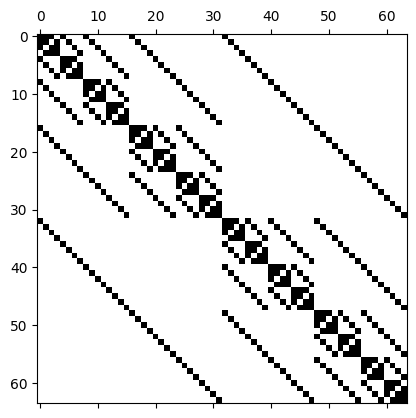

In [9]:
# in a spy plot, the non-zero entries of the matrix are black
# we can here check that the dimension of the matrix is 2^n x 2^n = 64 x 64
_ = plt.spy(tfim)